In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('/content/Sample-Detailed Sales.xlsx')#replace the path with your path
data

,INV_NO,INV_DATE,SALESREP_NO,CUSTNO,PROD_CODE,UNIT_PRICE,QTY,SALES_BEF_TAX,SALES_TAX,SALES_PLUS_TAX
0,1000047,2015-07-16,101,21254,5,5.99,72,431.28,43.13,474.41
1,1000054,2015-03-12,101,21256,5,5.99,63,377.37,37.74,415.11
2,1000115,2015-06-05,101,21257,5,5.99,1209,7241.91,724.19,7966.10
3,1000171,2015-05-25,101,21274,5,5.99,250,1497.50,149.75,1647.25
4,1000199,2015-03-13,101,21285,5,5.99,435,2605.65,260.57,2866.22
...,...,...,...,...,...,...,...,...,...,...
895,1000483,2015-10-26,128,20914,5,5.99,159,952.41,95.24,1047.65
896,1000728,2015-10-26,128,20915,5,5.99,49,293.51,29.35,322.86
897,1000810,2015-08-27,128,20914,5,5.99,500,2995.00,299.50,3294.50
898,1000870,2015-08-31,128,20915,5,5.99,81,485.19,48.52,533.71


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   INV_NO          900 non-null    int64         
 1   INV_DATE        900 non-null    datetime64[ns]
 2   SALESREP_NO     900 non-null    int64         
 3   CUSTNO          900 non-null    int64         
 4   PROD_CODE       900 non-null    int64         
 5   UNIT_PRICE      900 non-null    float64       
 6   QTY             900 non-null    int64         
 7   SALES_BEF_TAX   900 non-null    float64       
 8   SALES_TAX       900 non-null    float64       
 9   SALES_PLUS_TAX  900 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 70.4 KB


In [5]:
data.describe()

,INV_NO,SALESREP_NO,CUSTNO,PROD_CODE,UNIT_PRICE,QTY,SALES_BEF_TAX,SALES_TAX,SALES_PLUS_TAX
count,9.000000e+02,900.000000,900.000000,900.000000,900.000000,900.000000,9.000000e+02,900.000000,9.000000e+02
mean,1.000450e+06,114.944444,46343.930000,4.871111,14.487233,562.107778,1.269074e+04,1269.014856,1.395920e+04
std,2.600009e+02,7.861511,28493.830945,0.522091,90.635631,1514.875119,1.757735e+05,17576.003775,1.933496e+05
min,1.000001e+06,101.000000,10000.000000,1.000000,5.990000,0.000000,-4.792000e+01,-4.790000,-5.271000e+01
25%,1.000226e+06,108.000000,21092.000000,5.000000,5.990000,64.500000,4.357725e+02,43.580000,4.793525e+02
50%,1.000450e+06,115.000000,40712.000000,5.000000,5.990000,178.500000,1.230945e+03,123.095000,1.334275e+03
75%,1.000675e+06,122.000000,61503.000000,5.000000,5.990000,500.000000,3.364883e+03,336.487500,3.701370e+03
max,1.000900e+06,128.000000,94211.000000,6.000000,1559.970000,17500.000000,3.899925e+06,389929.500000,4.289854e+06


there are negative values in sales_bef_tax,sales_tax and sales_plus_tax

In [6]:
data.rename(columns={'SALES_PLUS_TAX': 'TOTAL_SALES'}, inplace=True)

In [7]:
columns=['SALES_BEF_TAX','SALES_TAX','TOTAL_SALES']

In [8]:
for i in columns:
  data[i]= data[i].apply(lambda x: abs(x) if x < 0 else x)

In [9]:
data.describe()

,INV_NO,SALESREP_NO,CUSTNO,PROD_CODE,UNIT_PRICE,QTY,SALES_BEF_TAX,SALES_TAX,TOTAL_SALES
count,9.000000e+02,900.000000,900.000000,900.000000,900.000000,900.000000,9.000000e+02,900.000000,9.000000e+02
mean,1.000450e+06,114.944444,46343.930000,4.871111,14.487233,562.107778,1.269085e+04,1269.025500,1.395932e+04
std,2.600009e+02,7.861511,28493.830945,0.522091,90.635631,1514.875119,1.757735e+05,17576.003005,1.933496e+05
min,1.000001e+06,101.000000,10000.000000,1.000000,5.990000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.000226e+06,108.000000,21092.000000,5.000000,5.990000,64.500000,4.357725e+02,43.580000,4.793525e+02
50%,1.000450e+06,115.000000,40712.000000,5.000000,5.990000,178.500000,1.230945e+03,123.095000,1.334275e+03
75%,1.000675e+06,122.000000,61503.000000,5.000000,5.990000,500.000000,3.364883e+03,336.487500,3.701370e+03
max,1.000900e+06,128.000000,94211.000000,6.000000,1559.970000,17500.000000,3.899925e+06,389929.500000,4.289854e+06


In [10]:
data['TAX_PERCENT']=(data['SALES_TAX']*100)/data['SALES_BEF_TAX']

In [13]:
data.loc[data['SALES_BEF_TAX'] == 0, 'SALES_BEF_TAX'] = data['UNIT_PRICE'] * data['QTY']
data.loc[data['SALES_TAX'] == 0, 'SALES_TAX'] = data['SALES_BEF_TAX']*np.mean(data['TAX_PERCENT'])
data.loc[data['TOTAL_SALES']==0, 'TOTAL_SALES'] = data['SALES_BEF_TAX']+data['SALES_TAX']

In [14]:
data

,INV_NO,INV_DATE,SALESREP_NO,CUSTNO,PROD_CODE,UNIT_PRICE,QTY,SALES_BEF_TAX,SALES_TAX,TOTAL_SALES,TAX_PERCENT
0,1000047,2015-07-16,101,21254,5,5.99,72,431.28,43.13,474.41,10.000464
1,1000054,2015-03-12,101,21256,5,5.99,63,377.37,37.74,415.11,10.000795
2,1000115,2015-06-05,101,21257,5,5.99,1209,7241.91,724.19,7966.10,9.999986
3,1000171,2015-05-25,101,21274,5,5.99,250,1497.50,149.75,1647.25,10.000000
4,1000199,2015-03-13,101,21285,5,5.99,435,2605.65,260.57,2866.22,10.000192
...,...,...,...,...,...,...,...,...,...,...,...
895,1000483,2015-10-26,128,20914,5,5.99,159,952.41,95.24,1047.65,9.999895
896,1000728,2015-10-26,128,20915,5,5.99,49,293.51,29.35,322.86,9.999659
897,1000810,2015-08-27,128,20914,5,5.99,500,2995.00,299.50,3294.50,10.000000
898,1000870,2015-08-31,128,20915,5,5.99,81,485.19,48.52,533.71,10.000206


In [15]:
anova_result = stats.f_oneway(*[data[data['PROD_CODE'] == code]['TOTAL_SALES'] for code in data['PROD_CODE'].unique()])

In [16]:
anova_result

F_onewayResult(statistic=387.6249075161327, pvalue=5.765945665132919e-221)

the p-value (5.765945665132919e-221, which is approximately 0) is much smaller than the significance level of 0.05
 there is strong evidence to suggest that there is a significant difference in total sales among different product codes

In [17]:
anova_result1 = stats.f_oneway(*[data[data['SALESREP_NO'] == rep]['TOTAL_SALES'] for rep in data['SALESREP_NO'].unique()])

In [18]:
anova_result1

F_onewayResult(statistic=0.7991116231843064, pvalue=0.7514763452299986)

the p-value (0.7514763452299986) is greater than the significance level of 0.05 there is strong evidence to suggest that there is no significant difference in total sales among different Sales Rep

In [19]:
data['INV_MONTH'] = pd.to_datetime(data['INV_DATE']).dt.month

In [20]:
anova_result_month = stats.f_oneway(*[data[data['INV_MONTH'] == month]['TOTAL_SALES'] for month in data['INV_MONTH'].unique()])

In [21]:
anova_result_month

F_onewayResult(statistic=0.739302054983689, pvalue=0.7010489818565989)

the p-value (0.7010489818565989) is greater than the significance level of 0.05 there is strong evidence to suggest that there is no significant difference in total sales among different months

<ipython-input-22-14a8846fee6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

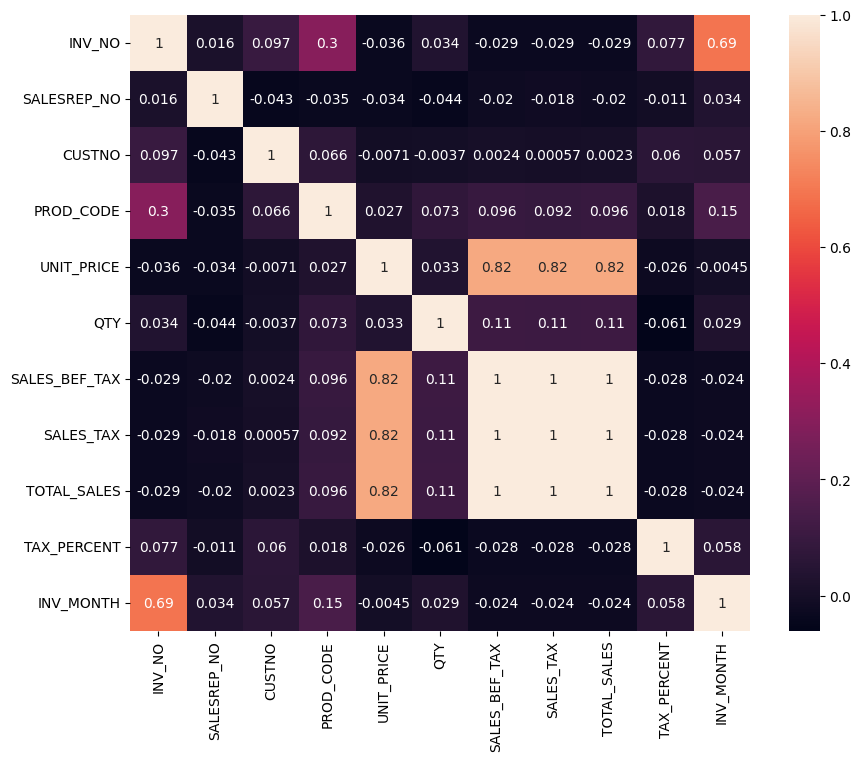

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)

correlation between INV_NO and INV_month can be ignored because the INV_NO is just a primary key for the table

In [23]:
np.corrcoef(data['TOTAL_SALES'],data['UNIT_PRICE'])

array([[1.        , 0.82052991],
       [0.82052991, 1.        ]])

a correlation coefficient of 0.82052991 indicates a strong positive linear relationship between unit price and total sales, suggesting that changes in unit price are closely associated with changes in total sales volume.

In [24]:
np.corrcoef(data['TOTAL_SALES'],data['QTY'])

array([[1.        , 0.10975074],
       [0.10975074, 1.        ]])

a correlation coefficient of 0.10975074 indicates a weak positive linear relationship between quantity and total sales,This indicates that as the quantity of items sold increases, the total sales tend to increase slightly, but the relationship is not very strong.